# Point this Project
Evaluate model classification to perform tweet sentiment Narendra Modi, use Naïve Bayes, SVM, KNN, LSTM, and BERT <br>

point bussiness
1. What's the populer discussion about modi?
2. How many speech hate with narendra modi?
3. What's the response citizen about Modi?


In [29]:
import re
import pandas as pd
from transformers import pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import pickle



## Import data

In [8]:
df = pd.read_csv('Twitter_Data.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [28]:
text = df['clean_text3'].head(1000).values.tolist()

number = 1
for i in text:
    print(f"{number}. {i}")
    number += 1

1. modi promised minimum government maximum governance expected begin difficult job reforming state take years get justice state business exit psus temples
2. talk nonsense continue drama vote modi
3. say vote modi welcome bjp told rahul main campaigner modi think modi relax
4. asking supporters prefix chowkidar names modi great service confusion read crustal clear crass filthy nonsensical see abuses coming chowkidars
5. answer among powerful world leader today trump putin modi may
6. kiya tho refresh maarkefir comment karo
7. surat women perform yagna seeks divine grace narendra modi become
8. comes cabinet scholars like modi smriti hema time introspect
9. upcoming election india saga going important pair look current modi leads govt elected deal brexit combination weekly looks juicy bears imho
10. gandhi gay modi
11. things like demonetisation gst goods services taxthe upper castes would sort either view favourably say need give time castes like dalits muslims modi constituency2
12. 

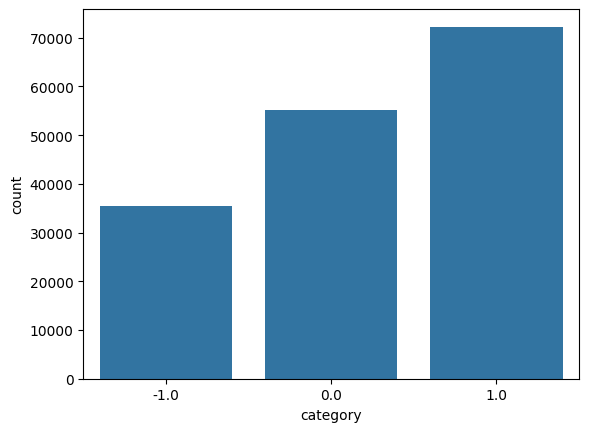

In [11]:
sns.countplot(x='category',data=df)
plt.show()

Feature Category merupakan labeling

## Preprocessing Data

In [12]:
print(f"Numbers of null ===================> \n{df.isnull().sum()}")
print(f"Numbers of duplicate ===================> {df.duplicated().sum()}")

Numbers of null ===================> 
clean_text    4
category      7
dtype: int64
Numbers of duplicate ===================> 1


In [13]:
#process data
df = df.dropna()
df = df.drop_duplicates()
print(f"Numbers of null ===================> \n{df.isnull().sum()}")
print(f"Numbers of duplicate ===================> {df.duplicated().sum()}")

Numbers of null ===================> 
clean_text    0
category      0
dtype: int64
Numbers of duplicate ===================> 0


In [14]:
def clean_data(df):
  df = df.dropna()
  df = df.drop_duplicates()
  return df

### Preprocess Link, lower str, tag

In [15]:
#remove space
df['clean_text'] = df['clean_text'].str.replace('\n',' ')
#change to lower str
df['clean_text'] = df['clean_text'].apply(lambda x: x.lower())
#remove tag like - or _
df['clean_text'] = df['clean_text'].str.replace('-'," ").str.replace('_'," ")

#### Remove Emoji


In [16]:
text = []
#emoji pattern
emoji_pattern = r"[^\w\s,.!?-]"
#remove pattern �
pattern = r"\uFFFD"
for i in df['clean_text'].values.tolist():
    clean_text = re.sub(emoji_pattern, '', i)
    clean_text = re.sub(pattern, '', clean_text)
    text.append(clean_text)


In [17]:
def preprocesss_word(df,columns) :
  #remove space
  df[columns] = df[columns].str.replace('\n',' ')
  #change to lower str
  df[columns] = df[columns].apply(lambda x: x.lower())
  #remove tag like - or _
  df[columns] = df[columns].str.replace('-'," ").str.replace('_'," ")
  #remove emoji
  text = []
  emoji_pattern = r"[^\w\s,.!?-]"
  #remove pattern �
  pattern = r"\uFFFD"
  for i in df['clean_text'].values.tolist():
      clean_text = re.sub(emoji_pattern, '', i)
      clean_text = re.sub(pattern, '', clean_text)
      text.append(clean_text)
  df['final_text'] = text
  return df

In [18]:
df['clean_text2'] = text

In [19]:
df.head(5)

,clean_text,category,clean_text2
0,when modi promised “minimum government maximum...,-1.0,when modi promised minimum government maximum ...
1,talk all the nonsense and continue all the dra...,0.0,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...,1.0,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...,1.0,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...,1.0,answer who among these the most powerful world...


### StopWord

In [20]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords') # cleaning text dari noise khusus stop words
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [21]:
stop_words = set(stopwords.words('english'))
print(stop_words)


{'being', 'now', "you'll", 'theirs', 'he', "i've", 'wouldn', "he'll", 'an', "he's", 'as', 'only', 'there', 'been', "aren't", 'not', 've', "haven't", "i'm", 'against', "hadn't", "mightn't", 'your', 'themselves', 'having', 's', 'a', 'again', 'those', 'isn', 'same', "won't", 'y', 'down', 'couldn', "needn't", "shouldn't", 'is', 'further', 'then', 'itself', 'shan', 'them', 'her', 'where', "mustn't", 'have', 'yourself', 'don', 'other', 'did', 'hasn', 'ma', 'my', 'to', 'on', 'up', 'ain', 'each', 'what', "weren't", 'was', "they'll", "you'd", 'we', 'she', 'be', "didn't", 'll', 'does', 'didn', 'or', "it'll", "she's", 'for', 'into', "we've", "i'll", 'too', 'so', 'its', "isn't", 'with', 'off', 'the', 'any', 't', 'i', "you're", 'after', 'it', 'why', 'do', "they'd", 'but', 'while', "hasn't", "she'll", 'under', 'all', 'how', 'needn', 'if', 'himself', 'nor', 'than', 'very', "it's", "wouldn't", 'm', 'shouldn', "you've", 'who', 'until', "i'd", "she'd", "we'll", 'just', 'few', 'are', 'here', 'some', 'thr

In [22]:
#remove stop word
def preprocess_text(text):
    words = nltk.word_tokenize(text)
    filtered_token = []
    for token in words :
        if token not in stop_words:
            filtered_token.append(token)
    return ' '.join(filtered_token)


In [23]:
df['clean_text3'] = df['clean_text2'].apply(preprocess_text)

In [27]:
df.head(5)

,clean_text,category,clean_text2,clean_text3
0,when modi promised “minimum government maximum...,Negative,when modi promised minimum government maximum ...,modi promised minimum government maximum gover...
1,talk all the nonsense and continue all the dra...,Netral,talk all the nonsense and continue all the dra...,talk nonsense continue drama vote modi
2,what did just say vote for modi welcome bjp t...,Positive,what did just say vote for modi welcome bjp t...,say vote modi welcome bjp told rahul main camp...
3,asking his supporters prefix chowkidar their n...,Positive,asking his supporters prefix chowkidar their n...,asking supporters prefix chowkidar names modi ...
4,answer who among these the most powerful world...,Positive,answer who among these the most powerful world...,answer among powerful world leader today trump...


In [31]:
with open('model.pkl','wb') as file : 
    pickle.dump(df[['clean_text3','category']],file)

In [25]:
#change value use clasification
df['category'] = df['category'].astype(int)
category= {
    -1 : 'Negative',
    0 : 'Netral',
    1 : 'Positive'
}
df['category'] = df['category'].map(category)

## EDA

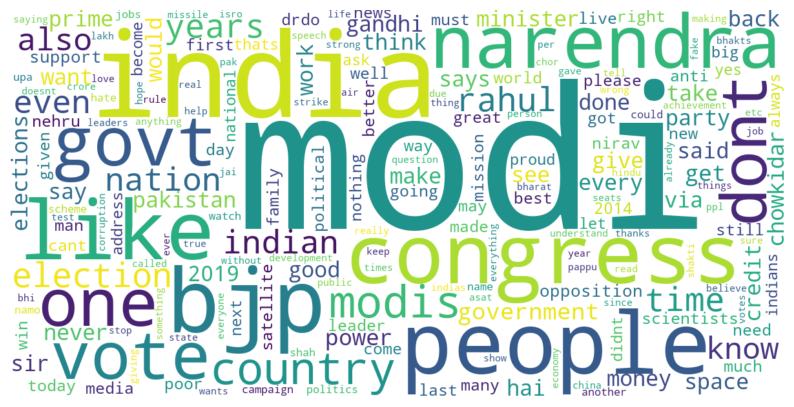

In [26]:
from collections import Counter
import nltk

# Combine all preprocessed text into a single string
all_text = ' '.join(df['clean_text3'].astype(str))

# Tokenize the combined text into words
words = nltk.word_tokenize(all_text)

# Calculate word frequencies
word_frequencies = Counter(words)

wc = WordCloud(width=1200, height=600, background_color='white')
wc.generate_from_frequencies(word_frequencies)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Feature Extraction

In [22]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 29.1 MB/s eta 0:00:00


In [27]:
from gensim.models import Word2Vec

# Tokenize each sentence into a list of words
sentence = [nltk.word_tokenize(i) for i in df['clean_text3'].values.tolist()]

model = Word2Vec(
    sentences=sentence,
    vector_size=500,
    window=5,
    min_count=2,
    workers=4,
    sg=1
)
model.save('word2vec.model')

In [28]:
print(f"Vocabulary size: {len(model.wv.index_to_key)}")
print(model.wv.index_to_key[:50]) # Print first 50 words to avoid excessive output
# print(model.wv.most_similar('modi'))

Vocabulary size: 40525
['modi', 'india', 'bjp', 'people', 'congress', 'like', 'narendra', 'govt', 'vote', 'one', 'dont', 'country', 'modis', 'election', 'years', 'rahul', 'time', 'indian', 'nation', 'even', 'also', 'know', 'government', 'power', 'get', 'gandhi', 'want', 'minister', 'good', 'give', 'space', 'would', 'money', 'says', 'said', 'hai', 'see', 'done', 'credit', 'party', 'pakistan', 'sir', 'make', 'prime', 'every', 'think', 'say', 'take', 'back', 'via']
[('modiwho', 0.6759651303291321), ('amd', 0.648674488067627), ('wholeheartedly', 0.6461353898048401), ('bjpand', 0.6452518105506897), ('heels', 0.6421085596084595), ('in2019', 0.6418206691741943), ('modijee', 0.6412737369537354), ('modibut', 0.6408731937408447), ('modiif', 0.6404690742492676), ('halfway', 0.6398760676383972)]


## Classfication

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score

X = df['clean_text3']
y = df['category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tfidf_vectorizer = TfidfVectorizer()
X_train_vec = tfidf_vectorizer.fit_transform(X_train)
X_test_vec = tfidf_vectorizer.transform(X_test)

In [ ]:
model_log =  LogisticRegression()
model_log.fit(X_train_vec, y_train)

In [ ]:
#predict
y_pred = model_log.predict(X_test_vec)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

In [ ]:
word = "Modi’s speeches often inspire his supporters during election seasons."
word_vec = tfidf_vectorizer.transform([word])
prediction = model_log.predict(word_vec)
print(prediction)


array([0])

## Create Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf', TfidfVectorizer(), 'clean_text3')
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', LogisticRegression())
])